# Descriptive Analysis

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import date
import re

In [2]:
pd.set_option('display.max_columns', None)

## Loading data

In [3]:
ratings_df = pd.read_csv('Prepared Frames/rating_data.csv')
main_df = pd.read_csv('Prepared Frames/rated.csv')

In [4]:
main_df.columns

Index(['Ticker', 'Company Name', 'IndustryId', 'Fiscal Year', 'Fiscal Period',
       'Report Date', 'Shares (Diluted)',
       'Cash, Cash Equivalents & Short Term Investments',
       'Accounts & Notes Receivable', 'Total Current Assets',
       'Property, Plant & Equipment, Net', 'Other Long Term Assets',
       'Total Noncurrent Assets', 'Total Assets', 'Payables & Accruals',
       'Total Current Liabilities', 'Total Noncurrent Liabilities',
       'Total Liabilities', 'Share Capital & Additional Paid-In Capital',
       'Retained Earnings', 'Total Equity', 'Revenue', 'Cost of Revenue',
       'Gross Profit', 'Operating Expenses',
       'Selling, General & Administrative', 'Operating Income (Loss)',
       'Non-Operating Income (Loss)', 'Interest Expense, Net',
       'Pretax Income (Loss), Adj.', 'Abnormal Gains (Losses)',
       'Pretax Income (Loss)', 'Income Tax (Expense) Benefit, Net',
       'Income (Loss) from Continuing Operations',
       'Net Extraordinary Gains (Losses

## Removing bad data
During the analysis I repeatedly came across implausible data or mismatched companies.
I will drop the problematic entries here at the beginning of the notebook, so that all consecutive analysis are also corrected.

In [5]:
main_df.shape

(8662, 41)

In [6]:
# This company was mismatched
main_df = main_df[main_df['Ticker']!='RBBN']
main_df = main_df[main_df['Ticker']!='MPLN']
# This row has implausible data, the interest expenses are 10 times higher than their whole assets
main_df.drop(index =[1856],inplace = True, axis = 0) 
main_df.drop(index =[3063],inplace = True, axis = 0)

In [7]:
main_df.index[1857]

1858

## About the ratings

https://www.moodys.com/sites/products/productattachments/ap075378_1_1408_ki.pdf

We are looking at moodys long term credit ratings. They are structured in the following order from best to worst.

Investment grade:
Aaa
Aa
A
Baa

Non Investment Grade:
Ba
B
Caa
Ca
C

Default:
D

The appended number is an indicator weather a company ranges on the upper or lower end of their credit
rating.
Sice these create a lot of sub-categories we will remove the appended numbers and just look at the actual ratings.

In [8]:
# Removing numbers:
def rem_digits(rating):
    return re.sub('[0-9]','',rating)

main_df['Rating'] = main_df['Rating'].apply(rem_digits)

In [9]:
# Saving with the cleaned Ratings
main_df.to_csv('Prepared Frames/rated_v2.csv', index=False)

In [10]:
# Extra column for sorting
# Since sorting the rating alphabetically does not give us the right order. 
# I will create an extra column with a numerized version, that will help us visualize better.

rating_numbered = {'Aaa':11,'Aa':12,'A':13,'Baa':21,'Ba':22,'B':23,'Caa':31,'Ca':32,'C':33,'D':40}
main_df['Rating_numbered'] = main_df['Rating'].map(rating_numbered)

## Distribution of ratings

<AxesSubplot:xlabel='Rating', ylabel='count'>

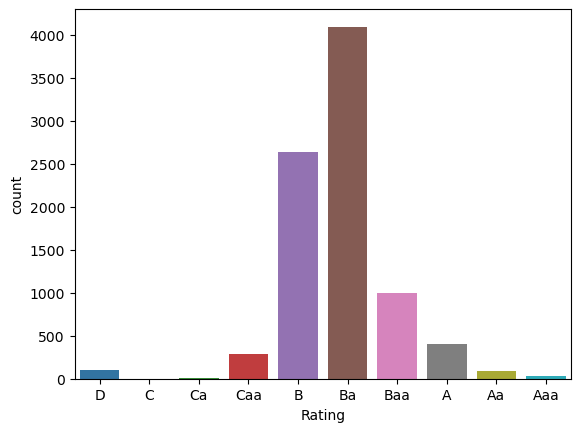

In [11]:
# We can see a big number of companies with B ratings and very few with A or C
sns.countplot(x='Rating', data=main_df.sort_values(by = ['Rating_numbered'], ascending = False))

We can see a lot of concentration on the middle field, with a low amount of companies in the A-grade range.
It looks, like the majority of companies are non investment grade. We will look at the numbers.

In [12]:
# Investment grade:
id_count = len(main_df[main_df['Rating_numbered']<22])
id_count
entries = len(main_df)

id_count/len(main_df) *100

17.625982431807675

## Insight :
Only 17 percent of our dataframe are investment grade.

## Interest expenses
We calculate a columnm, that gives us an estimate of the average interst expense of a company in relation to their total debt load.

In [13]:
main_df['interest_ratio'] = main_df['Interest Expense, Net']/main_df['Total Liabilities']*-100

I multiply in the end with 100 to have the number as a percentage.
Since I divide by the interest expenses, which have a negative sign, I negate that, to get a positive percentage.
Some companies have actual income through this, since they have big cash or investment postitions, I will not include them,
because we are interested in if copmpanies have to pay more because of their rating. These companies now end up with a - in front of their interest rate.

In [14]:
main_df.sort_values(by = ['interest_ratio'], ascending = False) 

,Ticker,Company Name,IndustryId,Fiscal Year,Fiscal Period,Report Date,Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Sector,Industry,reduced_matches,Rating,Rating_numbered,interest_ratio
3405,CHNG,Change Healthcare Inc.,101003.0,2018,Q4,2019-03-31,75475585.0,3409000.0,706946250.0,5563000.0,1.774438e+08,1.293260e+09,1.293260e+09,1.298823e+09,176000.0,6.343000e+06,1.599930e+08,1.663360e+08,1.153584e+09,-17841000.0,1.132487e+09,0.000000e+00,-3.074140e+08,423573125.0,-971000.0,-971000.0,-971000.0,-6.944800e+07,-4.879744e+07,-70419000.0,0.0,-5.463000e+06,1931000.0,-3.532000e+06,0.0,-3.532000e+06,-3.532000e+06,Technology,Application Software,change healthcare,B,23,29.336671
4141,CHNG,Change Healthcare Inc.,101003.0,2019,Q1,2019-06-30,75474654.0,3409000.0,706946250.0,5584000.0,1.774438e+08,1.302342e+09,1.302342e+09,1.307926e+09,343000.0,6.510000e+06,1.699920e+08,1.765020e+08,1.159446e+09,-19983000.0,1.131424e+09,0.000000e+00,-3.074140e+08,423573125.0,-251000.0,-251000.0,-251000.0,-8.031164e+07,-4.879744e+07,-251000.0,0.0,-3.970100e+07,2184000.0,-3.751700e+07,0.0,-3.751700e+07,-3.751700e+07,Technology,Application Software,change healthcare,B,23,27.646964
4466,CHNG,Change Healthcare Inc.,101003.0,2019,Q2,2019-09-30,142749052.0,3409000.0,706946250.0,23825000.0,1.774438e+08,1.861434e+09,2.120671e+09,2.144496e+09,453000.0,2.512000e+07,2.332690e+08,2.583890e+08,2.006618e+09,-113918000.0,1.886107e+09,0.000000e+00,-3.074140e+08,423573125.0,-1138000.0,-1138000.0,-1138000.0,6.640000e+05,-4.879744e+07,-474000.0,0.0,-1.075540e+08,13620000.0,-9.393400e+07,0.0,-9.393400e+07,-9.393400e+07,Technology,Application Software,change healthcare,B,23,18.885264
8534,UNIT,Uniti Group Inc.,109001.0,2021,Q4,2021-12-31,264421000.0,58903000.0,38455000.0,97358000.0,3.508939e+09,1.202946e+09,4.711885e+09,4.809243e+09,197958000.0,1.817132e+09,5.105885e+09,6.923017e+09,1.214853e+09,47200000.0,-2.113774e+09,2.930090e+08,-1.234845e+08,146898500.0,-146586000.0,-25376000.0,393392000.0,-3.607450e+08,-3.515030e+08,32647000.0,0.0,3.072700e+07,5199000.0,3.592600e+07,0.0,3.582500e+07,3.561000e+07,Real Estate,REITs,uniti,B,23,5.077310
4897,PRO,"PROS Holdings, Inc.",101003.0,2019,Q4,2019-12-31,42614000.0,306077000.0,65074000.0,385945000.0,1.479400e+07,1.125680e+08,1.273620e+08,5.133070e+08,64502000.0,1.961340e+08,1.521770e+08,3.483110e+08,5.605430e+08,-361789000.0,1.649960e+08,6.617500e+07,-2.836100e+07,37814000.0,-52631000.0,-34493000.0,-14817000.0,-2.171000e+06,-1.476500e+07,-16988000.0,0.0,-1.724200e+07,-58000.0,-1.730000e+07,0.0,-1.730000e+07,-1.730000e+07,Technology,Application Software,pos,Baa,21,4.239028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5857,GENC,GENCOR INDUSTRIES INC,100009.0,2020,Q3,2020-06-30,14723000.0,124239000.0,1609000.0,162123000.0,8.391000e+06,5.300000e+04,8.444000e+06,1.705670e+08,4783000.0,7.434000e+06,1.306000e+06,8.740000e+06,1.377400e+07,148053000.0,1.618270e+08,2.294000e+07,-1.755500e+07,5385000.0,-3371000.0,-2522000.0,2014000.0,5.020000e+05,5.120000e+05,2516000.0,0.0,5.404000e+06,-1082000.0,4.322000e+06,0.0,4.322000e+06,4.322000e+06,Industrials,Farm & Construction Machinery,enpro industries,Ba,22,-5.858124
6453,DE

<AxesSubplot:xlabel='interest_ratio', ylabel='Count'>

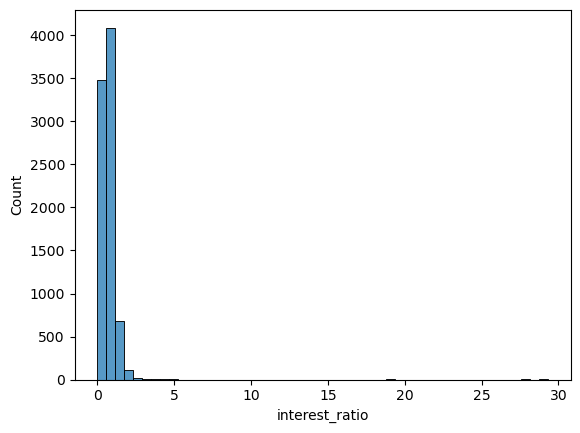

In [15]:
sns.histplot(data=main_df[main_df['interest_ratio'] > 0]['interest_ratio'], bins = 50)

Distribution for Rating:B


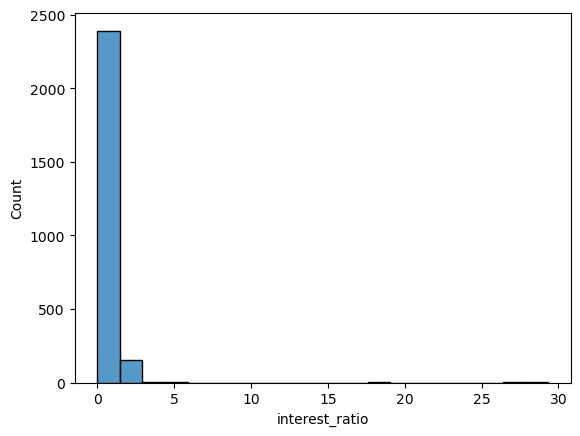

Distribution for Rating:Ba


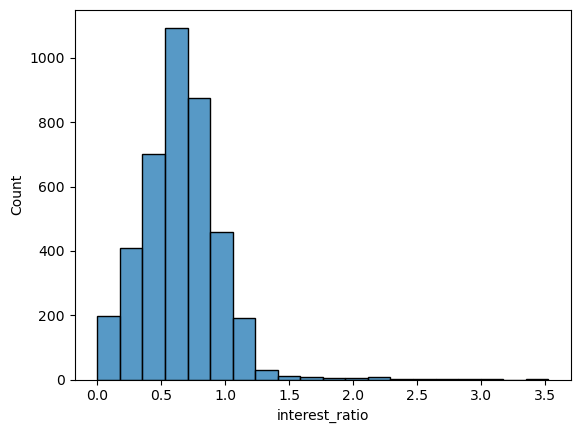

Distribution for Rating:Baa


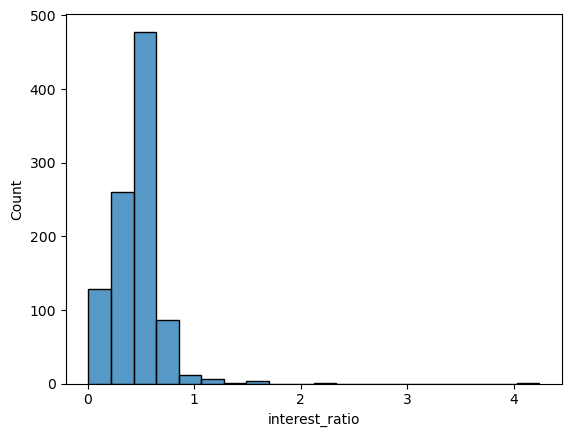

Distribution for Rating:A


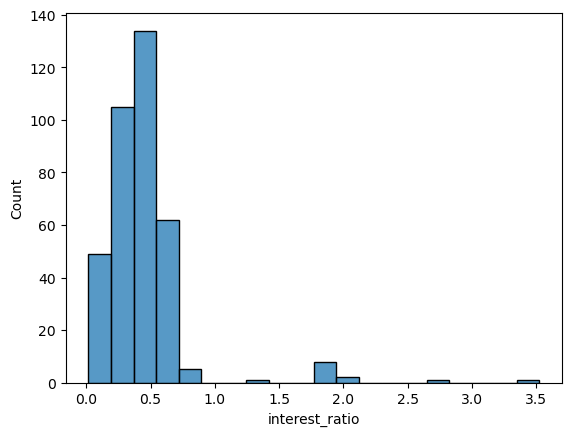

Distribution for Rating:Aa


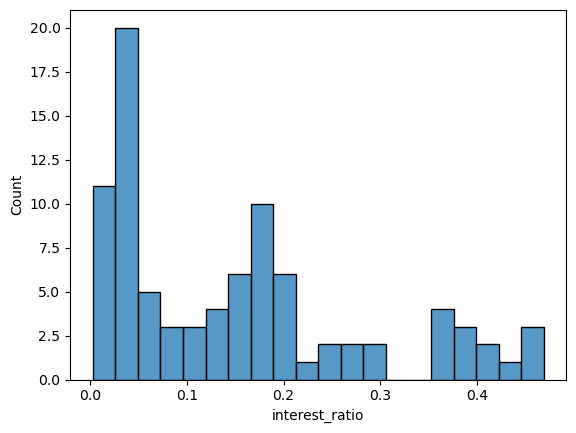

Distribution for Rating:Caa


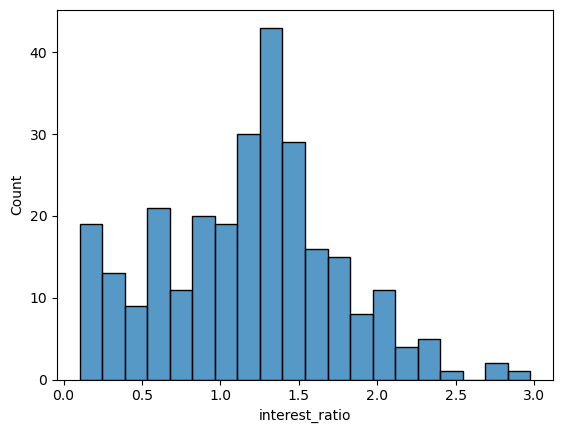

Distribution for Rating:D


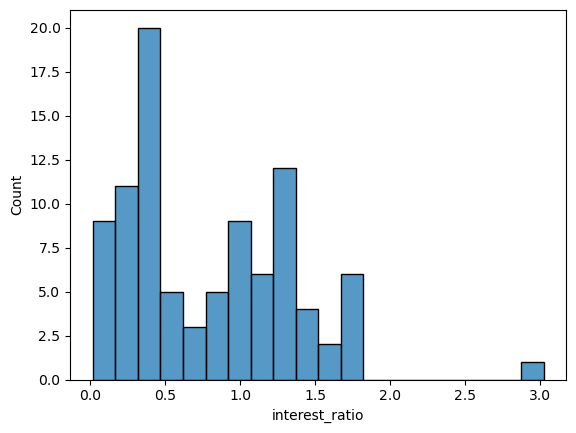

Distribution for Rating:Aaa


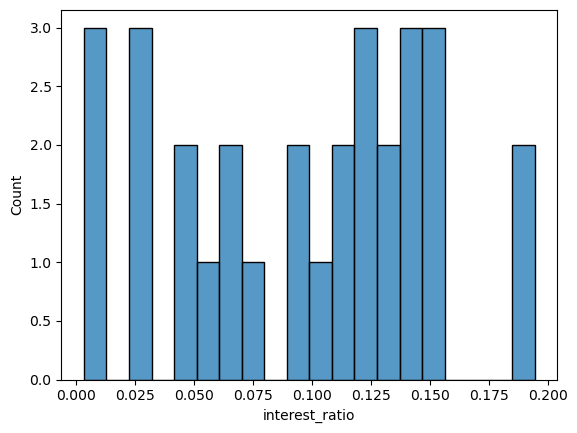

Distribution for Rating:Ca


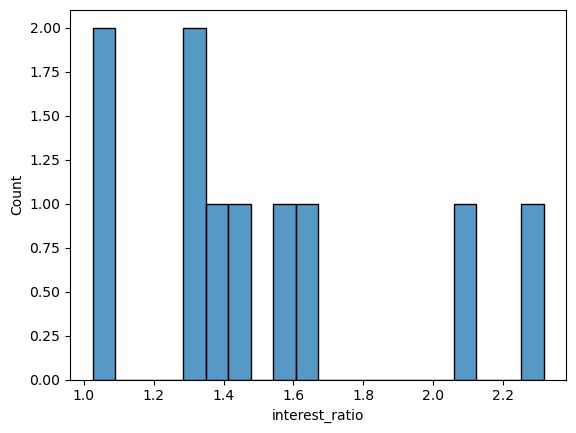

Distribution for Rating:C


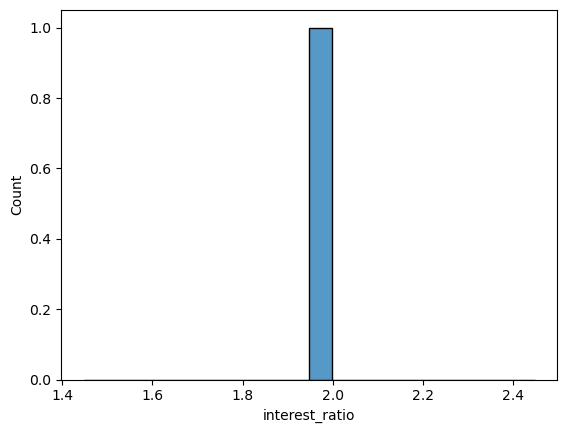

In [16]:
# We look at the distribution for different credit ratings
for rating in list(main_df['Rating'].unique()):
    print('Distribution for Rating:' + str(rating))
    sns.histplot(data=main_df[ (main_df['interest_ratio'] > 0) & (main_df['Rating'] == rating)]['interest_ratio'], bins = 20)
    plt.show()

It is not visible very good, but we see a definitive tendency, that companies with a higher credit rating tend to have higher interest expenses.

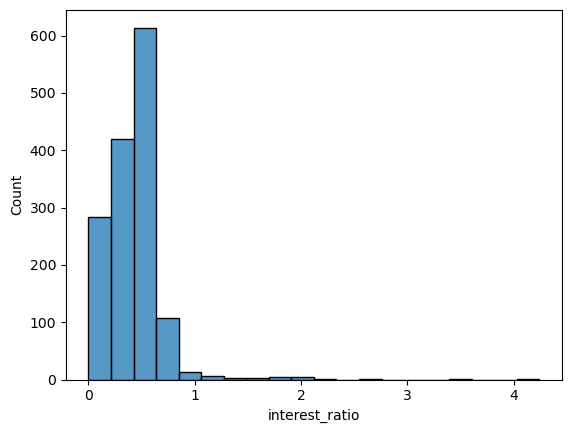

In [17]:
# For companies with investment grade
sns.histplot(data=main_df[ (main_df['interest_ratio'] > 0) & (main_df['Rating_numbered'] < 22)]['interest_ratio'], bins = 20)
plt.show()

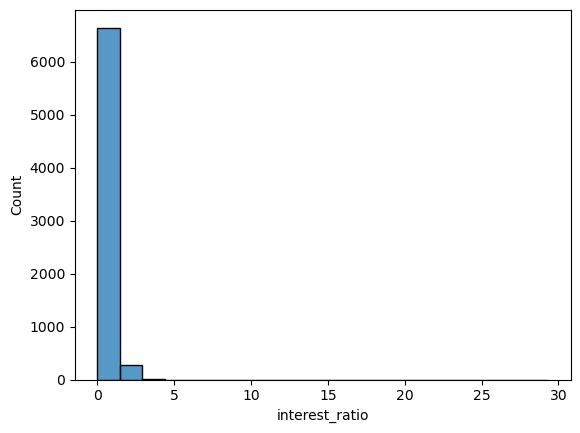

In [18]:
# For companies without investment grade
sns.histplot(data=main_df[ (main_df['interest_ratio'] > 0) & (main_df['Rating_numbered'] >= 22)]['interest_ratio'], bins = 20)
plt.show()

In [19]:
# This way we see a clear distinction

## Calculating the average interst expense to liability for Baa rates vs Ba rated for the presentation

In [20]:
avg_baa = np.mean(main_df[main_df['Rating']=='Baa']['interest_ratio'])
avg_baa

0.4373456622345111

In [21]:
avg_ba = np.mean(main_df[main_df['Rating']=='Ba']['interest_ratio'])
avg_ba

0.6103823843191043

In [22]:
# That makes a percentage difference of
((avg_ba/avg_baa)-1)*100
# 39.5%

39.56520826124219

## Picking an example for impact of interest expenses
What we are looking for is a company with high interest expenses wich is still making a profit, we serach in our data for one.
This will be for a fictive example of how key metrics could be affected by a change in credit rating.

In [23]:
# We need acolumn with income to interest expense ratio to search for a fitting company
main_df['income_to_interest'] = (main_df['Interest Expense, Net']/main_df['Pretax Income (Loss)'])*-1 # We change the sign to have a positive value, since this is a ratio.

In [24]:
# We search for a company with a high ratio, which has a Baa rating
main_df[main_df['Rating']=='Baa'].sort_values(by = 'income_to_interest', ascending = False).head(50)

,Ticker,Company Name,IndustryId,Fiscal Year,Fiscal Period,Report Date,Shares (Diluted),"Cash, Cash Equivalents & Short Term Investments",Accounts & Notes Receivable,Total Current Assets,"Property, Plant & Equipment, Net",Other Long Term Assets,Total Noncurrent Assets,Total Assets,Payables & Accruals,Total Current Liabilities,Total Noncurrent Liabilities,Total Liabilities,Share Capital & Additional Paid-In Capital,Retained Earnings,Total Equity,Revenue,Cost of Revenue,Gross Profit,Operating Expenses,"Selling, General & Administrative",Operating Income (Loss),Non-Operating Income (Loss),"Interest Expense, Net","Pretax Income (Loss), Adj.",Abnormal Gains (Losses),Pretax Income (Loss),"Income Tax (Expense) Benefit, Net",Income (Loss) from Continuing Operations,Net Extraordinary Gains (Losses),Net Income,Net Income (Common),Sector,Industry,reduced_matches,Rating,Rating_numbered,interest_ratio,income_to_interest
3042,GE,GENERAL ELECTRIC CO,100001.0,2018,Q4,2018-12-31,1.389084e+09,6.868200e+10,3.385700e+10,1.209780e+11,4.983900e+10,1.387670e+11,1.886060e+11,3.095840e+11,1.681700e+10,6.786000e+10,1.898630e+11,2.577230e+11,3.620600e+10,9.310900e+10,5.186400e+10,8.675000e+09,-2.608000e+09,6.067000e+09,-4.639000e+09,-1.096000e+09,1.428000e+09,-694000000.0,-959000000.0,7.340000e+08,0.0,6000000.0,584000000.0,590000000.0,0.0,7.620000e+08,5.750000e+08,Industrials,Industrial Products,general electric,Baa,21,0.372105,159.833333
1552,BG,Bunge LTD,102002.0,2017,Q4,2017-12-31,1.411951e+08,6.010000e+08,1.501000e+09,1.040300e+10,5.310000e+09,3.158000e+09,8.468000e+09,1.887100e+10,3.395000e+09,6.215000e+09,5.299000e+09,1.151400e+10,5.227000e+09,8.081000e+09,7.357000e+09,1.160500e+10,-1.114300e+10,4.620000e+08,-3.930000e+08,-3.930000e+08,6.900000e+07,-60000000.0,-63000000.0,9.000000e+06,0.0,1000000.0,-54000000.0,-53000000.0,0.0,-6.000000e+07,-6.900000e+07,Consumer Defensive,Consumer Packaged Goods,bunge,Baa,21,0.547160,63.000000
1821,BG,Bunge LTD,102002.0,2018,Q1,2018-03-31,1.407369e+08,2.870000e+08,1.686000e+09,1.337600e+10,5.735000e+09,3.973000e+09,9.708000e+09,2.308400e+10,3.909000e+09,8.550000e+09,6.787000e+09,1.533700e+10,5.234000e+09,8.008000e+09,7.747000e+09,1.064100e+10,-1.025700e+10,3.840000e+08,-3.440000e+08,-3.440000e+08,4.000000e+07,-38000000.0,-62000000.0,2.000000e+06,0.0,2000000.0,-19000000.0,-17000000.0,0.0,-2.100000e+07,-2.900000e+07,Consumer Defensive,Consumer Packaged Goods,bunge,Baa,21,0.404251,31.000000
1081,SRE,Sempra Energy,105001.0,2017,Q3,2017-09-30,2.533640e+08,1.890000e+08,1.387000e+09,3.010000e+09,3.538400e+10,1.173500e+10,4.711900e+10,5.012900e+10,2.095000e+09,7.194000e+09,2.743300e+10,3.462700e+10,3.088000e+09,1.085500e+10,1.550200e+10,2.679000e+09,-9.580000e+08,1.721000e+09,-1.251000e+09,-1.304889e+09,4.700000e+08,-113000000.0,-153000000.0,3.570000e+08,0.0,5000000.0,84000000.0,102000000.0,0.0,5.700000e+07,5.700000e+07,Utilities,Utilities - Regulated,sempra energy,Baa,21,0.441852,30.600000
6756,RTX,RAYTHEON TECHNOLOGIES CORP,100008.0,2020,Q4,2020-12-31,1.497300e+09,8.802000e+09,9.254000e+09,4.337600e+10,1.496200e+10,1.038150e+11,1.187770e+11,1.621530e+11,2.216200e+10,3.584800e+10,5.242100e+10,8.826900e+10,3.693000e+10,4.942300e+10,7.388400e+10,1.641900e+10,-1.426600e+10,2.153000e+09,-2.011000e+09,-1.351000e+09,1.420000e+08,-349000000.0,-349000000.0,-2.070000e+08,0.0,37000000.0,178000000.0,215000000.0,0.0,1.350000e+08,1.350000e+08,Industrials,Aerospace & Defense,raytheon technologies,Baa,21,0.395382,9.432432
1445,PNM,PNM RESOURCES INC,105002.0,2017,Q4,2017-12-31,8.016800e+07,3.974000e+06,1.080550e+08,2.944200e+08,4.980227e+09,1.030919e+09,6.351683e+09,6.646103e+09,1.837400e+08,8.356440e+08,4.037482e+09,4.873126e+09,1.157665e+09,6.335280e+08,1.772977e+09,3.326050e+08,-1.359610e+08,1.966440e+08,-1.445320e+08,-4.528200e+07,5.211200e+07,-29906000.0,-27920000.0,2.220600e+07,0.0,4601000.0,-55186000.0,-50585000.0,0.0,-5.415000e+07,-5.428200e+07,Utilities,Utilities - Independent Power Producers,pnm,Baa,21,0.572938,6.068246
4933,EM

In [25]:
# We added in more companies after we took ourr example. It was Ebay Inc Q3 2019

# Feature Engineering

## We create an additional column, with only Investment Grade or Non Investment Grade

In [26]:
main_df['Investment_Grade'] = main_df['Rating_numbered'].apply(lambda x: 'Investment Grade' if x < 22 else 'Non Investment Grade' )

In [27]:
pivot = main_df.pivot_table(index= ['Investment_Grade'], values = ['Total Liabilities'] ,aggfunc = ['sum'])
pivot

,sum
,Total Liabilities
Investment_Grade,
Investment Grade,5.788209e+13
Non Investment Grade,5.757700e+13


## Sum of total liabilities per rating

In [28]:
pivot = main_df.pivot_table(index= ['Rating'], values = ['Total Liabilities'] ,aggfunc = ['sum'])
pivot

,sum
,Total Liabilities
Rating,
A,1.665901e+13
Aa,9.206760e+12
Aaa,3.982949e+12
B,9.450235e+12
Ba,4.640307e+13
Baa,2.803338e+13
C,1.686546e+09
Ca,4.227304e+10


In [29]:
# We can see, that the sum of liabilities is distributed way more evenly than the number of companies.

# Saving for tableau presentation

In [30]:
# Since tableau seems to have a problem with the commas in the text parts we drop them, since we only need the summarized data
# for visualizations
tableau_interest = main_df[main_df['interest_ratio']>0].drop(['Company Name','reduced_matches'],axis = 1)
tableau_interest.to_csv('Data for Tableau/interest_rate.csv', index=False)

In [31]:
# Saving Final Frame
main_df.to_csv('Prepared Frames/rated_v3.csv', index=False)